## Analysis of genes/CDS annotated as "hypothetical", "putative", or "unknown".

Here: filter on length and pident matching at or above 95% level.

In [42]:
from Bio import SeqIO, Seq
from Bio.SeqRecord import SeqRecord
from BCBio import GFF
import gffutils as gff
import copy
import pandas
from IPython.display import Markdown as md

## Load reference data (genome sequences and annotation)

#### Current working dir.

In [43]:
pwd

'/home/grotec/Repositories/sbw25_newgenome/annotate/geneious'

### Read the annotations

In [44]:
db = gff.FeatureDB("gnl_MPB_PFLU_1-20210416_.gff3.db")

In [45]:
import pandas

## Load sprot annotation table

In [46]:
sprot = pandas.read_csv('uniprot_sprot.tsv', sep='\t')

In [47]:
gene_names = sprot["Gene names"].str.split(" ")

In [48]:
pflus = [gn[-1] for gn in gene_names]

In [49]:
sprot["locus tag"] = pflus

In [50]:
sprot.head()

Entry    Entry name                                      Protein names  \
0  C3JYN4    ZIPA_PSEFS                         Cell division protein ZipA   
1  C3K5X7  C3K5X7_PSEFS  Cell division protein ZapE (Z ring-associated ...   
2  C3K1G2    YIDC_PSEFS  Membrane protein insertase YidC (Foldase YidC)...   
3  C3KCR8  C3KCR8_PSEFS                       Ribosome-binding ATPase YchF   
4  C3K2K8    YBEY_PSEFS                 Endoribonuclease YbeY (EC 3.1.-.-)   

       Gene names                                           Sequence  \
0  zipA PFLU_4589  MEIGLREWLIVIGIIVIAGILFDGWRRMRGGKGKLKFRLDRNLSNL...   
1  zapE PFLU_0835  MTPLERYQADLKRPEFFHDAAQETAVRHLQRLYDDLVAASQSKPGM...   
2  yidC PFLU_6134  MDIKRTILIVALAIVSYVMVLKWNQDYGQAALPTQNVATNQAAPAI...   
3  ychF PFLU_0729  MGFNCGIVGLPNVGKSTLFNALTKSGIAAENFPFCTIEPNSGIVAM...   
4  ybeY PFLU_5406  MLELDLQLATEAPAPSEAQFREWCALALRQRTADSELTIRLVDEPE...   

  Transcript ID  locus tag  
0      CAY51327  PFLU_4589  
1      CAY47103  PFLU_0835  
2      CAY53750  PFLU_6134  
3      CAY46998  PFLU_0729  
4      CAY52573  PFLU_5406

## Read in the blast results table.

In [51]:
blastp_data = pandas.read_csv("putatives_blastp_out.tsv", sep="\t", header=None)

In [52]:
blastp_data.head()

0                     1                     2   \
0  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS   
1  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q3K8D5|TTCA_PSEPF   
2  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q4ZQ35|TTCA_PSEU2   
3  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q48FG8|TTCA_PSE14   
4  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q885Z7|TTCA_PSESM   

                     3    4   5    6    7   8    9    10    11   12       13  \
0  sp|C3JY43|TTCA_PSEFS  274   1  274  274   1  274  0.0  1470  274  100.000   
1  sp|Q3K8D5|TTCA_PSEPF  274   1  274  274   1  274  0.0  1442  274   97.080   
2  sp|Q4ZQ35|TTCA_PSEU2  274   1  274  274   1  274  0.0  1405  274   93.796   
3  sp|Q48FG8|TTCA_PSE14  274   1  274  274   1  274  0.0  1405  274   93.431   
4  sp|Q885Z7|TTCA_PSESM  274   1  274  274   1  274  0.0  1388  274   92.336   

    14  15  16  17                                                 18  
0  274   0   0   0  sp|C3JY43|TTCA_PSEFS tRNA-cytidine(32) 2-sulfu...  
1  266   8   0   0  sp|Q3K8D5|TTCA_PSEPF tRNA-cytidine(32) 2-sulfu...  
2  257  17   0   0  sp|Q4ZQ35|TTCA_PSEU2 tRNA-cytidine(32) 2-sulfu...  
3  256  18   0   0  sp|Q48FG8|TTCA_PSE14 tRNA-cytidine(32) 2-sulfu...  
4  253  21   0   0  sp|Q885Z7|TTCA_PSESM tRNA-cytidine(32) 2-sulfu...

In [53]:
# Have to set the column headers.
columns=["qseqid","qacc","sallseqid","sallacc","slen","sstart","send","qlen","qstart","qend","evalue","score","length","pident","nident","mismatch","gapopen","gaps","salltitles"]

In [54]:
blastp_data.columns = columns

### Drop uninteresting columns

In [55]:
blastp_data.drop(columns=["qseqid", "sallacc", "evalue",  "score", "length", "nident", "mismatch", "gapopen", "gaps"], inplace=True)

In [56]:
qacc = blastp_data.qacc.str.split("|", expand=True)

In [57]:
qacc.rename(axis=1, mapper={0:"query status", 1:"query uniprot id", 2:"query mnemonic "}, inplace=True)

In [58]:
blastp_data = blastp_data.join(qacc)

In [59]:
sallseqid = blastp_data.sallseqid.str.split("|", expand=True)

In [60]:
sallseqid.rename(axis=1, mapper={0:"subject status", 1:"subject uniprot id", 2:"subject mnemonic "}, inplace=True)

In [61]:
blastp_data = blastp_data.join(sallseqid)

In [62]:
blastp_data.drop(columns=["sallseqid", 'qacc'], inplace=True)

In [63]:
blastp_data.head()

slen  sstart  send  qlen  qstart  qend   pident  \
0   274       1   274   274       1   274  100.000   
1   274       1   274   274       1   274   97.080   
2   274       1   274   274       1   274   93.796   
3   274       1   274   274       1   274   93.431   
4   274       1   274   274       1   274   92.336   

                                          salltitles query status  \
0  sp|C3JY43|TTCA_PSEFS tRNA-cytidine(32) 2-sulfu...           sp   
1  sp|Q3K8D5|TTCA_PSEPF tRNA-cytidine(32) 2-sulfu...           sp   
2  sp|Q4ZQ35|TTCA_PSEU2 tRNA-cytidine(32) 2-sulfu...           sp   
3  sp|Q48FG8|TTCA_PSE14 tRNA-cytidine(32) 2-sulfu...           sp   
4  sp|Q885Z7|TTCA_PSESM tRNA-cytidine(32) 2-sulfu...           sp   

  query uniprot id query mnemonic  subject status subject uniprot id  \
0           C3JY43      TTCA_PSEFS             sp             C3JY43   
1           C3JY43      TTCA_PSEFS             sp             Q3K8D5   
2           C3JY43      TTCA_PSEFS             sp             Q4ZQ35   
3           C3JY43      TTCA_PSEFS             sp             Q48FG8   
4           C3JY43      TTCA_PSEFS             sp             Q885Z7   

  subject mnemonic   
0        TTCA_PSEFS  
1        TTCA_PSEPF  
2        TTCA_PSEU2  
3        TTCA_PSE14  
4        TTCA_PSESM

In [64]:
blastp_data = blastp_data.merge(sprot, left_on="query uniprot id", right_on="Entry")

In [65]:
blastp_data.head()

slen  sstart  send  qlen  qstart  qend   pident  \
0   274       1   274   274       1   274  100.000   
1   274       1   274   274       1   274   97.080   
2   274       1   274   274       1   274   93.796   
3   274       1   274   274       1   274   93.431   
4   274       1   274   274       1   274   92.336   

                                          salltitles query status  \
0  sp|C3JY43|TTCA_PSEFS tRNA-cytidine(32) 2-sulfu...           sp   
1  sp|Q3K8D5|TTCA_PSEPF tRNA-cytidine(32) 2-sulfu...           sp   
2  sp|Q4ZQ35|TTCA_PSEU2 tRNA-cytidine(32) 2-sulfu...           sp   
3  sp|Q48FG8|TTCA_PSE14 tRNA-cytidine(32) 2-sulfu...           sp   
4  sp|Q885Z7|TTCA_PSESM tRNA-cytidine(32) 2-sulfu...           sp   

  query uniprot id  ... subject status subject uniprot id subject mnemonic   \
0           C3JY43  ...             sp             C3JY43        TTCA_PSEFS   
1           C3JY43  ...             sp             Q3K8D5        TTCA_PSEPF   
2           C3JY43  ...             sp             Q4ZQ35        TTCA_PSEU2   
3           C3JY43  ...             sp             Q48FG8        TTCA_PSE14   
4           C3JY43  ...             sp             Q885Z7        TTCA_PSESM   

    Entry  Entry name                                      Protein names  \
0  C3JY43  TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   
1  C3JY43  TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   
2  C3JY43  TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   
3  C3JY43  TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   
4  C3JY43  TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   

       Gene names                                           Sequence  \
0  ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...   
1  ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...   
2  ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...   
3  ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...   
4  ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...   

  Transcript ID  locus tag  
0      CAY50081  PFLU_3786  
1      CAY50081  PFLU_3786  
2      CAY50081  PFLU_3786  
3      CAY50081  PFLU_3786  
4      CAY50081  PFLU_3786  

[5 rows x 21 columns]

In [66]:
ref_gene_annotations = pandas.DataFrame(index=blastp_data["Transcript ID"].unique(), columns=["Ref. annotation"])

In [67]:
for idx in ref_gene_annotations.index:
    for i,p in enumerate(db.parents("transcript:{}".format(idx))):
        if i > 0:
            print("WARNING: More than 1 gene as parent of transcript:%s", idx)
        ref_gene_annotations.loc[idx, "Ref. annotation"] = ";".join(p.attributes.get('description'))

In [68]:
blastp_data = blastp_data.merge(ref_gene_annotations, left_on="Transcript ID", right_index=True)

## Determine number of hits in bins of `pident` level.

In [69]:
blastp_data["pident_level"] = pandas.cut(blastp_data['pident'],bins=[0,60,90,97,100], labels=["poor (0-60)", "fair (60-90)", "good (90-95)", "excellent (95-100)"])

<AxesSubplot:title={'center':'Number of blastp hits in `pident` categories.'}, ylabel='pident_level'>

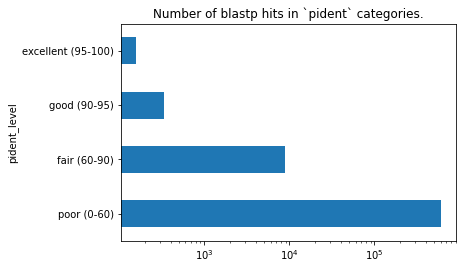

In [70]:
blastp_data.groupby("pident_level").count()['pident'].plot(kind='barh', logx=True, title="Number of blastp hits in `pident` categories.")

In [ ]:
* 

## Analyse only hits with pident >= 95 

In [84]:
pident_cutoff = 95.0

In [71]:
top = blastp_data[blastp_data.pident_level=="excellent (95-100)"]

In [72]:
protein_lengths = [len(seq) for seq in top["Sequence"].values]

In [73]:
protein_lengths = copy.deepcopy(protein_lengths)

In [74]:
top.loc[:,"protein length"] = protein_lengths

/home/grotec/.conda/envs/bio/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/grotec/.conda/envs/bio/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [75]:
hypos95 = top.loc[:,["Gene names", "Transcript ID", "query status", "query mnemonic ", "Ref. annotation", "salltitles", "protein length", "slen", "qlen"]].groupby("Gene names").first()

In [76]:
#hypos95.to_csv("hypos95.csv", index=True, header=True, sep=",")

In [77]:
top.loc[:,["Gene names", "Transcript ID",  "Ref. annotation", "query mnemonic ", "salltitles"]].groupby("Gene names").first()

Transcript ID                                  Ref. annotation  \
Gene names                                                                      
PFLU_0090           CAY46375          conserved hypothetical membrane protein   
PFLU_0322           CAY46600                   conserved hypothetical protein   
PFLU_0667           CAY46935                     putative adenosine deaminase   
PFLU_0879           CAY47146                   conserved hypothetical protein   
PFLU_0992           CAY47256                   conserved hypothetical protein   
...                      ...                                              ...   
xseA PFLU_5048      CAY52033  putative exodeoxyribonuclease VII large subunit   
yacG PFLU_0788      CAY47057                   conserved hypothetical protein   
ybeY PFLU_5406      CAY52573                   conserved hypothetical protein   
yidC PFLU_6134      CAY53750                  putative inner membrane protein   
zipA PFLU_4589      CAY51327                   putative cell division protein   

               query mnemonic   \
Gene names                       
PFLU_0090           Y090_PSEFS   
PFLU_0322           FETP_PSEFS   
PFLU_0667            ADE_PSEFS   
PFLU_0879           Y879_PSEFS   
PFLU_0992           Y992_PSEFS   
...                        ...   
xseA PFLU_5048      EX7L_PSEFS   
yacG PFLU_0788      YACG_PSEFS   
ybeY PFLU_5406      YBEY_PSEFS   
yidC PFLU_6134      YIDC_PSEFS   
zipA PFLU_4589      ZIPA_PSEFS   

                                                       salltitles  
Gene names                                                         
PFLU_0090       sp|Q4KKI8|Y093_PSEF5 UPF0391 membrane protein ...  
PFLU_0322       sp|C3K6U5|FETP_PSEFS Probable Fe(2+)-trafficki...  
PFLU_0667       sp|C3K8W2|ADE_PSEFS Adenine deaminase OS=Pseud...  
PFLU_0879       sp|C3K839|Y879_PSEFS Nucleotide-binding protei...  
PFLU_0992       sp|C3KE01|Y992_PSEFS UPF0246 protein PFLU_0992...  
...                                                           ...  
xseA PFLU_5048  sp|C3K1K5|EX7L_PSEFS Exodeoxyribonuclease 7 la...  
yacG PFLU_0788  sp|C3KE92|YACG_PSEFS DNA gyrase inhibitor YacG...  
ybeY PFLU_5406  sp|C3K2K8|YBEY_PSEFS Endoribonuclease YbeY OS=...  
yidC PFLU_6134  sp|C3K1G2|YIDC_PSEFS Membrane protein insertas...  
zipA PFLU_4589  sp|C3JYN4|ZIPA_PSEFS Cell division protein Zip...  

[112 rows x 4 columns]

## Now filter all queries from trEMBL and subject in SwissProt

We are interested in those software annotated queries (accession prefix "tr") that have a match in the reviewed section of Uniprot, i.e, SwissProt (prefix "sp").

In [78]:
tr_top = top[top['query status'] == "tr"]

In [87]:
md(f"{len(tr_top)} queries are trEMBL entries that have a >= {pident_cutoff}% match in SwissProt.")

24 queries are trEMBL entries that have a >= 95.0% match in SwissProt.

In [89]:
tr_top["query uniprot id"]

106601    C3JY61
106602    C3JY61
106603    C3JY61
106604    C3JY61
106605    C3JY61
106606    C3JY61
106607    C3JY61
106608    C3JY61
106609    C3JY61
106610    C3JY61
106611    C3JY61
106612    C3JY61
106613    C3JY61
106614    C3JY61
131078    C3K8K1
290377    C3K515
314107    C3K1X8
314108    C3K1X8
314109    C3K1X8
314111    C3K1X8
314112    C3K1X8
380182    C3K2K6
380183    C3K2K6
413203    C3JZQ0
Name: query uniprot id, dtype: object

In [90]:
md(f"Out of these {len(tr_top)}, there are {len(tr_top['query uniprot id'].unique())} unique proteins:")

Out of these 24, there are 6 unique proteins:

In [91]:
tr_top["query uniprot id"].unique()

array(['C3JY61', 'C3K8K1', 'C3K515', 'C3K1X8', 'C3K2K6', 'C3JZQ0'],
      dtype=object)

In [93]:
tr_top.loc[:,["Gene names", "Transcript ID",  "Ref. annotation", "query mnemonic ", "salltitles", "pident"]].groupby("Gene names").first()

Transcript ID  \
Gene names                     
PFLU_1908           CAY48153   
PFLU_2427           CAY48657   
PFLU_4161           CAY50667   
infA PFLU_3804      CAY50111   
miaB PFLU_5404      CAY52570   
rplU PFLU_5171      CAY52223   

                                                  Ref. annotation  \
Gene names                                                          
PFLU_1908       putative chloride transport-related membrane p...   
PFLU_2427                           putative alkaline phosphatase   
PFLU_4161                    putative L-asparaginase II precursor   
infA PFLU_3804        putative translation initiation factor IF-1   
miaB PFLU_5404                     conserved hypothetical protein   
rplU PFLU_5171                 putative 50S ribosomal protein L21   

               query mnemonic   \
Gene names                       
PFLU_1908         C3K515_PSEFS   
PFLU_2427         C3K8K1_PSEFS   
PFLU_4161         C3JZQ0_PSEFS   
infA PFLU_3804    C3JY61_PSEFS   
miaB PFLU_5404    C3K2K6_PSEFS   
rplU PFLU_5171    C3K1X8_PSEFS   

                                                       salltitles   pident  
Gene names                                                                  
PFLU_1908       sp|Q87WD2|ERIC_PSESM Chloride/fluoride channel...   97.098  
PFLU_2427       sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  100.000  
PFLU_4161       sp|O68897|ASPQ_PSEFA Glutaminase-asparaginase ...   97.514  
infA PFLU_3804  sp|A4VLV5|IF1_PSEU5 Translation initiation fac...  100.000  
miaB PFLU_5404  sp|Q4K5I3|MIAB_PSEF5 tRNA-2-methylthio-N(6)-di...   97.285  
rplU PFLU_5171  sp|Q889F3|RL21_PSESM 50S ribosomal protein L21...   98.039

In [95]:
askomics_query_results = pandas.read_csv("http://raineyhub.evolbio.mpg.de/mpistaff/CarstenFG/result.tsv", sep="\t")

In [99]:
def render_link(val):
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [101]:
askomics_query_results.style.format({"UniProt_Linked_IDs33_uri": render_link})

In [ ]:
use 